<a id='Q0'></a>
<center><a target="_blank" href="https://learning.constructor.org/"><img src="https://drive.google.com/uc?id=1wxkbM60NlBlkbGK1JqUypKL24RrTiiYk" width="200" style="background:none; border:none; box-shadow:none;" /></a> </center>

_____

<center>Constructor Learning, 2023</center>

# Exercise: Feed-forward NNs for Structured Data Classification


## Introduction

The idea of this exercise is to learn how to do structured data classification using neural networks, starting from a raw
CSV file. Our data includes both numerical and categorical features. 

### The dataset

[Our dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) is provided by the
Cleveland Clinic Foundation for Heart Disease.
It's a CSV file with 303 rows. Each row contains information about a patient (a
**sample**), and each column describes an attribute of the patient (a **feature**). We
use the features to predict whether a patient has a heart disease (**binary
classification**).

Here's the description of each feature:

Column| Description| Feature Type
------------|--------------------|----------------------
Age | Age in years | Numerical
Sex | (1 = male; 0 = female) | Categorical
CP | Chest pain type (0, 1, 2, 3, 4) | Categorical
Trestbpd | Resting blood pressure (in mm Hg on admission) | Numerical
Chol | Serum cholesterol in mg/dl | Numerical
FBS | fasting blood sugar in 120 mg/dl (1 = true; 0 = false) | Categorical
RestECG | Resting electrocardiogram results (0, 1, 2) | Categorical
Thalach | Maximum heart rate achieved | Numerical
Exang | Exercise induced angina (1 = yes; 0 = no) | Categorical
Oldpeak | ST depression induced by exercise relative to rest | Numerical
Slope | Slope of the peak exercise ST segment | Numerical
CA | Number of major vessels (0-3) colored by fluoroscopy | Both numerical & categorical
Thal | 3 = normal; 6 = fixed defect; 7 = reversible defect | Categorical
Target | Diagnosis of heart disease (1 = true; 0 = false) | Target

## Key Objectives - Day 1


1. Your key task is to perform a binary classification problem to predict heart disease based on the given data by splitting it into train-valid-test datasets

2. You will build a variety of dense neural network models starting from simple 1-layer NNs to 2 and 3 layer dense NNs

3. You will also plot learning curves to visualize training performance over epochs

4. You will also evaluate the performance of the models on the test dataset

5. You will also build a model using class weights to tackle class imbalance



## Load Dependencies

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline


In [2]:
tf.random.set_seed(3) # reproducibility

## Load the dataset

Let's download the data and load it into a Pandas dataframe:

In [3]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

The dataset includes 303 samples with 14 columns per sample (13 features, plus the target
label):

In [4]:
df.shape

(303, 14)

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    object 
 13  target    303 non-null    int64  
dtypes: float64(1), int64(12), object(1)
memory usage: 33.3+ KB


Here's a preview of a few samples:

In [5]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


The last column, "target", indicates whether the patient has a heart disease (1) or not
(0).

## Check the distribution of the target column

In [6]:
df.target.value_counts()

0    220
1     83
Name: target, dtype: int64

## Task 1: Split Dataset into Train, Validation and Test Datasets

Use stratified sampling to ensure similar `target` class distribution in the dataset splits when using `train_test_split()`

Use a split of 60:20:20 for train-valid-test splits
For reproducibility set the `random_state` to `42`

In [7]:
X=df.drop(columns=['target'])
y=df['target']

In [8]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=42, test_size=0.2, stratify = y)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42, test_size=0.2, stratify = y_train_full)

In [9]:
X_train_full.shape, X_train.shape, X_valid.shape

((242, 13), (193, 13), (49, 13))

## Task 2: Data Pre-processing

Recall the data pre-processing you had learnt during the ML week! Perform the following tasks to have clean and pre-processed datasets for your training, validation and test datasets.

Key Steps:

1. One-hot encode categorical data
2. Standard Scaling numerical data
3. Combine categorical and numeric data together into a single dataframe \ numpy array

Hints: Leverage code from [here](https://monolith.propulsion-home.ch/backend/api/momentum/materials/ds-materials/04_MachineLearning/day3/pages/MLG_D3_LC2_Classification_Models_Tackling_Class_Imbalance.html#Separate-categorical-and-numeric-columns) [pre-processing parts only]

In [11]:
# Define feature / target columns

categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_features = X_train.select_dtypes(include=['int', 'float']).columns.tolist()

categorical_transformer = Pipeline(steps=[
                                          ("onehot", OneHotEncoder(handle_unknown="ignore"))
                                          ])
numeric_transformer = Pipeline(steps=[
                                      ("scaler", StandardScaler())
                                      ])
preprocessor = ColumnTransformer(transformers=[
                                               ("num", numeric_transformer, 
                                                       numeric_features),
                                               ("cat", categorical_transformer, 
                                                       categorical_features)
                                               ])


In [ ]:
preprocessor

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs',
                                  'restecg', 'thalach', 'exang', 'oldpeak',
                                  'slope', 'ca']),
                                ('cat',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['thal'])])

In [12]:
pc_X_train=preprocessor.fit_transform(X_train)
pc_X_valid=preprocessor.transform(X_valid)
pc_X_test=preprocessor.transform(X_test)

In [13]:
feature_names = preprocessor.get_feature_names_out()
pc_X_train=pd.DataFrame(pc_X_train, columns=feature_names) 
pc_X_valid= pd.DataFrame(pc_X_valid, columns=feature_names) 
pc_X_test = pd.DataFrame(pc_X_test, columns=feature_names) 

## Task 3: Training simple 1-layer Neural Networks

Run the following experiments separately to train 1-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Build separate models for each experiment


### Experiment 1 - Basic NN: 
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- learning rate: 0.001
- optimizer is SGD
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 2 - NN with Adam Optimizer: 
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- learning rate: 0.001
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 3 - Experiment with lower Learning Rate: 
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- epochs: 500
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 4 - Experiment with Early Stopping: 
- 1-Dense Hidden Layer, 32 units, `relu` activation function
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports




### Hint: Utility function for plotting learning curves

You can use the following function to plot the learning curves after training. 

Remember to do the following during training:

```
history = model.fit(.......)

# to plot the curves
plot_metrics(history)
```

In [14]:
import matplotlib.pyplot as plt


def plot_metrics(history):

  keys = history.history.keys()
  metrics = ['loss', 'accuracy', 'precision', 'recall']
  plt.figure(figsize=(12, 10))
  for n, metric in enumerate(metrics):
    name = metric.capitalize()
    metric_name = [item for item in keys if metric in item and 'val_'+metric not in item][0]
    val_metric_name = [item for item in keys if 'val_'+metric in item][0]
    
    plt.subplot(2,2,n+1)
    plt.plot(history.epoch, history.history[metric_name], color='b', label='Train')
    plt.plot(history.epoch, history.history[val_metric_name], color='r', 
             linestyle="--", label='Val')
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.legend()

## Complete Task 3 Below

Experiment 1 - Basic NN:
1-Dense Hidden Layer, 32 units, relu activation function
1-Dense Output Layer, 1 unit, sigmoid activation function
learning rate: 0.001
optimizer is SGD
metrics: 'accuracy', precision, recall
loss: binary crossentropy
epochs: 500
batch size: 32
use training data and validation data in fit() function
use predict() on test data and show confusion matrix and classification reports

In [15]:
# TODO: Add number of output neurons    
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
sgd_optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=sgd_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)

In [16]:
history = model.fit(pc_X_train, y_train, epochs=500, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 48ms/step - loss: 0.6503 - accuracy: 0.6373 - precision: 0.4000 - recall: 0.6415 - val_loss: 0.6315 - val_accuracy: 0.6735 - val_precision: 0.4348 - val_recall: 0.7692
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.6478 - accuracy: 0.6425 - precision: 0.4048 - recall: 0.6415 - val_loss: 0.6273 - val_accuracy: 0.6735 - val_precision: 0.4348 - val_recall: 0.7692
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.6441 - accuracy: 0.6528 - precision: 0.4146 - recall: 0.6415 - val_loss: 0.6243 - val_accuracy: 0.6735 - val_precision: 0.4348 - val_recall: 0.7692
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 0.6414 - accuracy: 0.6528 - precision: 0.4146 - recall: 0.6415 - val_loss: 0.6207 - val_accuracy: 0.6735 - val_precision: 0.4348 - val_recall: 0.7692
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6383 - accuracy: 0.6528 - precision: 0.41

In [17]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)

cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.84      0.95      0.89        44
           1       0.82      0.53      0.64        17

    accuracy                           0.84        61
   macro avg       0.83      0.74      0.77        61
weighted avg       0.83      0.84      0.82        61



In [18]:
# y_pred

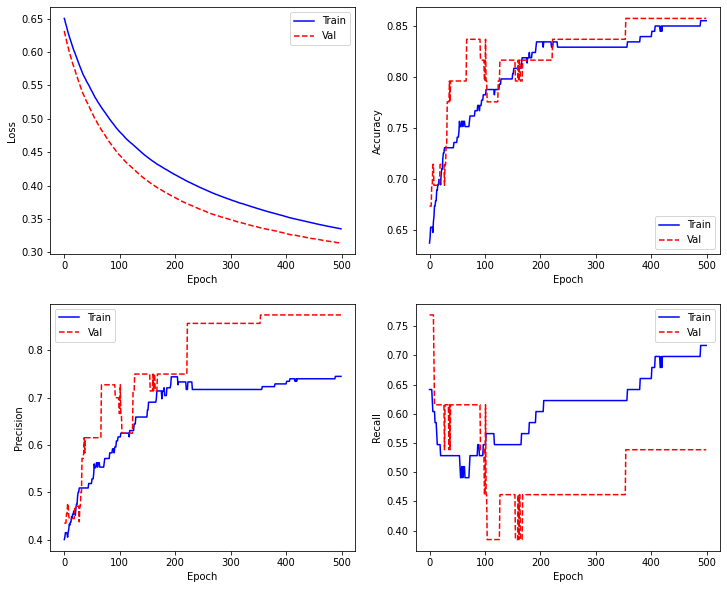

In [19]:
plot_metrics(history)

In [20]:
# Validation on the test data set
eval_test = model.evaluate(pc_X_test, y_test, verbose=0)
print("MSE of test set: {}".format(eval_test))

MSE of test set: [0.3675783574581146, 0.8360655903816223, 0.8181818127632141, 0.529411792755127]


**Experiment 2 - NN with Adam Optimizer**

In [21]:
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)

#History: Model fit 
history = model.fit(pc_X_train, y_train, epochs=500, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1)

Epoch 1/500
7/7 [==============================] - 1s 42ms/step - loss: 0.6494 - accuracy: 0.6839 - precision_1: 0.1667 - recall_1: 0.0377 - val_loss: 0.6233 - val_accuracy: 0.6327 - val_precision_1: 0.1429 - val_recall_1: 0.0769
Epoch 2/500
7/7 [==============================] - 0s 7ms/step - loss: 0.6127 - accuracy: 0.6995 - precision_1: 0.2727 - recall_1: 0.0566 - val_loss: 0.5940 - val_accuracy: 0.6327 - val_precision_1: 0.1429 - val_recall_1: 0.0769
Epoch 3/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5838 - accuracy: 0.7202 - precision_1: 0.4444 - recall_1: 0.0755 - val_loss: 0.5674 - val_accuracy: 0.6735 - val_precision_1: 0.2000 - val_recall_1: 0.0769
Epoch 4/500
7/7 [==============================] - 0s 7ms/step - loss: 0.5594 - accuracy: 0.7409 - precision_1: 0.6364 - recall_1: 0.1321 - val_loss: 0.5470 - val_accuracy: 0.7143 - val_precision_1: 0.4000 - val_recall_1: 0.1538
Epoch 5/500
7/7 [==============================] - 0s 10ms/step - loss: 0.5396 - ac

In [23]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 7ms/step
[[43  1]
 [10  7]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89        44
           1       0.88      0.41      0.56        17

    accuracy                           0.82        61
   macro avg       0.84      0.69      0.72        61
weighted avg       0.83      0.82      0.80        61



In [ ]:
# plot_metrics(history)

**Experiment 3 - Experiment with lower Learning Rate**

In [24]:
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # with lower learning rate

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)

#History: Model fit 
history = model.fit(pc_X_train, y_train, epochs=500, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1)

Epoch 1/500
7/7 [==============================] - 2s 96ms/step - loss: 0.6066 - accuracy: 0.7254 - precision_2: 0.5000 - recall_2: 0.2075 - val_loss: 0.6280 - val_accuracy: 0.6735 - val_precision_2: 0.2000 - val_recall_2: 0.0769
Epoch 2/500
7/7 [==============================] - 0s 12ms/step - loss: 0.6020 - accuracy: 0.7254 - precision_2: 0.5000 - recall_2: 0.2075 - val_loss: 0.6241 - val_accuracy: 0.6939 - val_precision_2: 0.2500 - val_recall_2: 0.0769
Epoch 3/500
7/7 [==============================] - 0s 21ms/step - loss: 0.5980 - accuracy: 0.7513 - precision_2: 0.6190 - recall_2: 0.2453 - val_loss: 0.6203 - val_accuracy: 0.6939 - val_precision_2: 0.2500 - val_recall_2: 0.0769
Epoch 4/500
7/7 [==============================] - 0s 21ms/step - loss: 0.5943 - accuracy: 0.7513 - precision_2: 0.6190 - recall_2: 0.2453 - val_loss: 0.6170 - val_accuracy: 0.7143 - val_precision_2: 0.3333 - val_recall_2: 0.0769
Epoch 5/500
7/7 [==============================] - 0s 17ms/step - loss: 0.5908 -

In [25]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 5ms/step
[[43  1]
 [11  6]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88        44
           1       0.86      0.35      0.50        17

    accuracy                           0.80        61
   macro avg       0.83      0.67      0.69        61
weighted avg       0.81      0.80      0.77        61



**Experiment 4 - Experiment with Early Stopping**

In [26]:
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # with lower learning rate

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
#History: Model fit 
history = model.fit(pc_X_train, y_train, epochs=500, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1,
                    callbacks=[early_stopping])

Epoch 1/500
7/7 [==============================] - 1s 43ms/step - loss: 0.9342 - accuracy: 0.3264 - precision_3: 0.2381 - recall_3: 0.6604 - val_loss: 0.9660 - val_accuracy: 0.2653 - val_precision_3: 0.2195 - val_recall_3: 0.6923
Epoch 2/500
7/7 [==============================] - 0s 9ms/step - loss: 0.9270 - accuracy: 0.3316 - precision_3: 0.2397 - recall_3: 0.6604 - val_loss: 0.9586 - val_accuracy: 0.2653 - val_precision_3: 0.2195 - val_recall_3: 0.6923
Epoch 3/500
7/7 [==============================] - 0s 10ms/step - loss: 0.9209 - accuracy: 0.3472 - precision_3: 0.2517 - recall_3: 0.6981 - val_loss: 0.9511 - val_accuracy: 0.2857 - val_precision_3: 0.2250 - val_recall_3: 0.6923
Epoch 4/500
7/7 [==============================] - 0s 6ms/step - loss: 0.9147 - accuracy: 0.3420 - precision_3: 0.2466 - recall_3: 0.6792 - val_loss: 0.9444 - val_accuracy: 0.2857 - val_precision_3: 0.2250 - val_recall_3: 0.6923
Epoch 5/500
7/7 [==============================] - 0s 7ms/step - loss: 0.9092 - ac

In [27]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 4ms/step
[[43  1]
 [ 8  9]]
              precision    recall  f1-score   support

           0       0.84      0.98      0.91        44
           1       0.90      0.53      0.67        17

    accuracy                           0.85        61
   macro avg       0.87      0.75      0.79        61
weighted avg       0.86      0.85      0.84        61



## Task 4: Training deep multi-layer Neural Networks

Run the following experiments separately to train multi-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Build separate models for each experiment


### Experiment 1 -  2-layer NN:  
- __2-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports

<br>

### Experiment 2 -  3-layer NN:  
- __3-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports


## Complete Task 4 Below

In [28]:
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
    tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 2
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # with lower learning rate

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
#History: Model fit 
history = model.fit(pc_X_train, y_train, epochs=1000, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1,
                    callbacks=[early_stopping])

Epoch 1/1000
7/7 [==============================] - 1s 40ms/step - loss: 0.7192 - accuracy: 0.4663 - precision_4: 0.2500 - recall_4: 0.4717 - val_loss: 0.7270 - val_accuracy: 0.4286 - val_precision_4: 0.2000 - val_recall_4: 0.3846
Epoch 2/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7120 - accuracy: 0.4819 - precision_4: 0.2577 - recall_4: 0.4717 - val_loss: 0.7215 - val_accuracy: 0.4490 - val_precision_4: 0.2083 - val_recall_4: 0.3846
Epoch 3/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7061 - accuracy: 0.4870 - precision_4: 0.2604 - recall_4: 0.4717 - val_loss: 0.7157 - val_accuracy: 0.5102 - val_precision_4: 0.2381 - val_recall_4: 0.3846
Epoch 4/1000
7/7 [==============================] - 0s 9ms/step - loss: 0.6998 - accuracy: 0.5130 - precision_4: 0.2697 - recall_4: 0.4528 - val_loss: 0.7105 - val_accuracy: 0.5510 - val_precision_4: 0.2632 - val_recall_4: 0.3846
Epoch 5/1000
7/7 [==============================] - 0s 10ms/step - loss: 0.6941

In [29]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 7ms/step
[[43  1]
 [12  5]]
              precision    recall  f1-score   support

           0       0.78      0.98      0.87        44
           1       0.83      0.29      0.43        17

    accuracy                           0.79        61
   macro avg       0.81      0.64      0.65        61
weighted avg       0.80      0.79      0.75        61



In [30]:
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 1
    tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)), #Neuron 2
    tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)),#Neuron 3
     tf.keras.layers.Dense(1, activation="sigmoid")] #output 
)

# compile the model using a simple SGD optimizer
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)  # with lower learning rate

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)
early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')
#History: Model fit 
history = model.fit(pc_X_train, y_train, epochs=1000, batch_size=32, validation_data=(pc_X_valid, y_valid), verbose=1,
                    callbacks=[early_stopping])

Epoch 1/1000
7/7 [==============================] - 1s 41ms/step - loss: 0.8426 - accuracy: 0.2953 - precision_5: 0.2781 - recall_5: 0.9811 - val_loss: 0.8487 - val_accuracy: 0.2653 - val_precision_5: 0.2653 - val_recall_5: 1.0000
Epoch 2/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8293 - accuracy: 0.3057 - precision_5: 0.2787 - recall_5: 0.9623 - val_loss: 0.8370 - val_accuracy: 0.2653 - val_precision_5: 0.2653 - val_recall_5: 1.0000
Epoch 3/1000
7/7 [==============================] - 0s 8ms/step - loss: 0.8185 - accuracy: 0.3057 - precision_5: 0.2787 - recall_5: 0.9623 - val_loss: 0.8250 - val_accuracy: 0.2653 - val_precision_5: 0.2653 - val_recall_5: 1.0000
Epoch 4/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.8075 - accuracy: 0.3109 - precision_5: 0.2802 - recall_5: 0.9623 - val_loss: 0.8137 - val_accuracy: 0.2449 - val_precision_5: 0.2500 - val_recall_5: 0.9231
Epoch 5/1000
7/7 [==============================] - 0s 7ms/step - loss: 0.7972 

In [31]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 4ms/step
[[42  2]
 [12  5]]
              precision    recall  f1-score   support

           0       0.78      0.95      0.86        44
           1       0.71      0.29      0.42        17

    accuracy                           0.77        61
   macro avg       0.75      0.62      0.64        61
weighted avg       0.76      0.77      0.73        61



## Task 5: Training deep multi-layer Neural Networks with Class Weights to tackle Class Imbalance

We know that our dataset is heavily imbalanced between the two classes, feel free to leverage the`class_weight` parameter in the `model.fit()` function and experiment with your own weights or use [compute class weight](https://scikit-learn.org/stable/modules/generated/sklearn.utils.class_weight.compute_class_weight.html) from `sklearn`


Run the following experiment to train multi-layer neural networks, evaluate the performance by looking at learning curve plots and finally check the performance of each of the following models on the test dataset.

Key workflow:

- Build model using architecture specification based on experiment
- Plot learning curves from model training to visualize performance over epochs on training and validation data
- Use trained model to predict and evaluate performance on test data
- Play around with the `class_weight` parameter when training


### Experiment 1 -  3-layer NN:  
- __3-Dense Hidden Layer, 32 units, `relu` activation function__
- 1-Dense Output Layer, 1 unit, `sigmoid` activation function
- __learning rate: 0.0001__
- __optimizer is Adam__
- metrics: 'accuracy', [precision](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Precision), [recall](https://www.tensorflow.org/api_docs/python/tf/keras/metrics/Recall)
- loss: [binary crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy)
- __epochs: 10000__
- __Use the [early stopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping) callback to stop training as soon as the validation loss doesn't decrease after 10 epochs i.e. `patience=10` and `monitor='val_loss'`__
- __Modify `class_weight` in `model.fit()`__
- batch size: 32
- use training data and validation data in `fit()` function
- use `predict()` on test data and show confusion matrix and classification reports


## Complete Task 5 Below

In [32]:
from sklearn.utils import class_weight
class_weight = class_weight.compute_class_weight(class_weight = 'balanced', 
                                               classes = np.unique(y_train),
                                               y = y_train)

In [33]:
class_weight = dict(enumerate(class_weight))

In [34]:
# TODO: Add number of output neurons    
input_shape=pc_X_train.shape[1]


model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)),
        tf.keras.layers.Dense(32, activation="relu", input_shape=(input_shape,)),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ]
)

# compile the model using a simple SGD optimizer

adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# TODO: Add loss function
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(), 
    optimizer=adam_optimizer, 
    metrics=["accuracy", tf.keras.metrics.Precision(), tf.keras.metrics.Recall()],
)

early_stopping = tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')



In [37]:
# history object

# When running this model, Keras maintains a so-called History object in the background. 
# The history object is the output of the fit operation so it can be accessed in your Python script by slightly adapting that row in the above code to:

# The History.history attribute is a dictionary recording training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

history = model.fit(pc_X_train, 
                    y_train, epochs=10000, 
                    batch_size=32, 
                    validation_data=(pc_X_valid, y_valid), 
                    verbose=1, 
                    callbacks= [early_stopping],
                    class_weight=class_weight)

# history.history

Epoch 1/10000
7/7 [==============================] - 1s 41ms/step - loss: 0.6685 - accuracy: 0.5337 - precision_6: 0.3271 - recall_6: 0.6604 - val_loss: 0.6718 - val_accuracy: 0.5714 - val_precision_6: 0.3182 - val_recall_6: 0.5385
Epoch 2/10000
7/7 [==============================] - 0s 10ms/step - loss: 0.6298 - accuracy: 0.6373 - precision_6: 0.4124 - recall_6: 0.7547 - val_loss: 0.6513 - val_accuracy: 0.6327 - val_precision_6: 0.3810 - val_recall_6: 0.6154
Epoch 3/10000
7/7 [==============================] - 0s 6ms/step - loss: 0.5963 - accuracy: 0.7150 - precision_6: 0.4891 - recall_6: 0.8491 - val_loss: 0.6192 - val_accuracy: 0.7755 - val_precision_6: 0.5625 - val_recall_6: 0.6923
Epoch 4/10000
7/7 [==============================] - 0s 7ms/step - loss: 0.5670 - accuracy: 0.7565 - precision_6: 0.5366 - recall_6: 0.8302 - val_loss: 0.5843 - val_accuracy: 0.7959 - val_precision_6: 0.6154 - val_recall_6: 0.6154
Epoch 5/10000
7/7 [==============================] - 0s 9ms/step - loss: 0

In [38]:
y_pred=model.predict(pc_X_test)
y_pred_classes = y_pred > 0.5

cm = confusion_matrix(y_test, y_pred_classes)
print(cm)
cr=classification_report(y_test,y_pred_classes)
print(cr)

2/2 [==============================] - 0s 4ms/step
[[41  3]
 [ 8  9]]
              precision    recall  f1-score   support

           0       0.84      0.93      0.88        44
           1       0.75      0.53      0.62        17

    accuracy                           0.82        61
   macro avg       0.79      0.73      0.75        61
weighted avg       0.81      0.82      0.81        61



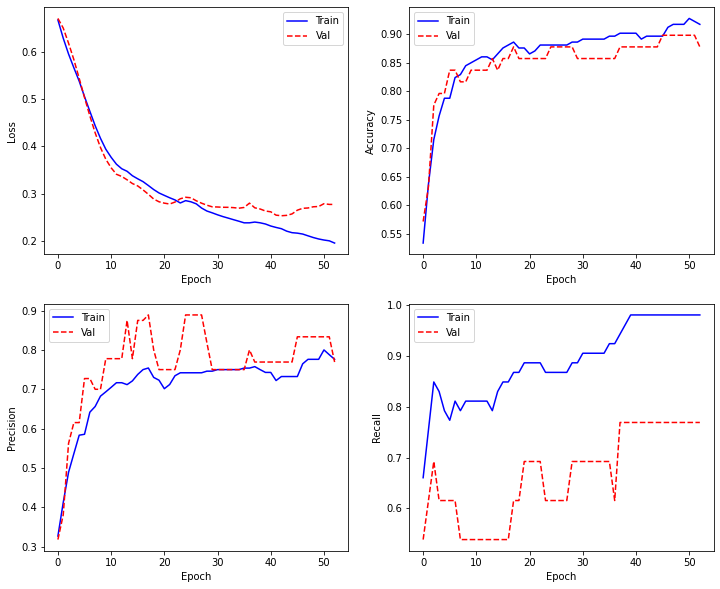

In [39]:
plot_metrics(history)